    customer_id                   name  age                    city                               country subscription_date
0             1            John Rivers   31              New Angela                 Sao Tome and Principe        2024-09-17
1             2        Richard Mcclure   21               Jamieside          Svalbard & Jan Mayen Islands        2021-07-19
2             3             Eric Smith   34          Port Mariastad                             Nicaragua        2025-06-08
3             4            Megan Price   47          South Samantha                                Turkey        2021-12-09
4             5           Pedro Guzman   20         South Laurabury                             Mauritius        2023-03-11
5             6          Thomas Morgan   61              Hannahland                          Saint Martin        2022-05-08
6             7            Derek Lewis   36           East Jennifer                                Norway        2021-01-29
7       

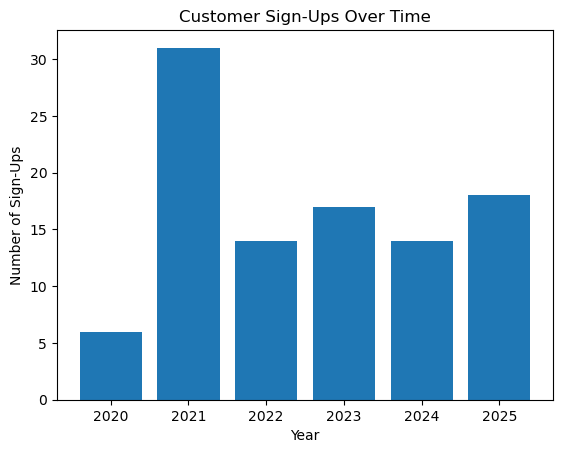

In [6]:
#Importing the required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#QUESTION 1
#1a. Loading a Dataset called "customer.csv" into a DataFrame:
df = pd.read_csv("customers.csv")
#Displaying the full data of the dataset:
print(df.to_string())
#Displaying the summary information of the dataset:
print(df.info())

"""
The standout observation at first load is that the dataset is messy and inconsistent,
with duplicates, missing values, and extreme outliers that must be addressed before analysis.
"""

#1b. Cleaning the dataset:
#i. Cleaning the subscription date:
#Setting the dates in the "subscription_date" column to the standard datetime format:
df["subscription_date"] = pd.to_datetime(df["subscription_date"], errors = "coerce")
#dropping null values in the "subscription_date" column:
df = df.dropna(subset = ["subscription_date"])
#Setting the date to not exceed "2020-01-01" and "2025-09-30":
df = df[(df["subscription_date"] >= "2020-01-01") & (df["subscription_date"] <= "2025-09-30")]

#ii. Extracting useful time-based features from "subscription_date":
df["year"] = df["subscription_date"].dt.year
df["month"] = df["subscription_date"].dt.month
df["day"] = df["subscription_date"].dt.day
df["quarter"] = df["subscription_date"].dt.quarter

#1c. Segmenting the customers into meaningful age groups:
bins = [0, 19, 35, 45, 60, 100]
labels = ["Teen", "Young Adult", "Adult", "Middle Age", "Senior"]
#Creating a new column, "age_group", to specify which age group each customer belongs to:
df["age_group"] = pd.cut(df["age"], bins = bins, labels = labels)

#1d. Identifying patterns in customer sign-ups over time:
#Assigning the values and index of the "year" column to a variable called "count" to be used to plot a bar chart:
# Counting the number of sign-ups per year, sorted by the "year" column
counts = df["year"].value_counts().sort_index()
#Plotting a bar chart of sign-ups per year:
plt.bar(counts.index, counts.values)
#Assigning a title, "Customer Sign-Ups Over Time", for the bar chart:
plt.title("Customer Sign-Ups Over Time")
#Assigning labels for both x and y axes:
plt.xlabel("Year")
plt.ylabel("Number of Sign-Ups")
#Display the chart:
plt.show()

#1e. Saving a cleaned version of the dataset to a new CSV file without the index column:
df.to_csv("customers_cleaned.csv", index = False)

   product_id product_name     category  units_sold   price     revenue
0        P001    Product_1       Sports        1488   36.46    54252.48
1        P002    Product_2        Books        2566  158.94   407840.04
2        P003    Product_3         Home         785  165.97   130286.45
3        P004    Product_4        Books        4024  366.16  1473427.84
4        P005    Product_5        Books          44  320.59    14105.96
5        P006    Product_6     Clothing        3162  444.17  1404465.54
6        P007    Product_7         Home        1965     NaN         NaN
7        P008    Product_8         Home        1595   64.20   102399.00
8        P009    Product_9         Home        3953  358.06  1415411.18
9        P010   Product_10        Books        3083     NaN         NaN
10       P011   Product_11       Sports        1031  282.83   291597.73
11       P012   Product_12         Home        3471  386.63  1341992.73
12       P013   Product_13        Books        2623  249.43   65

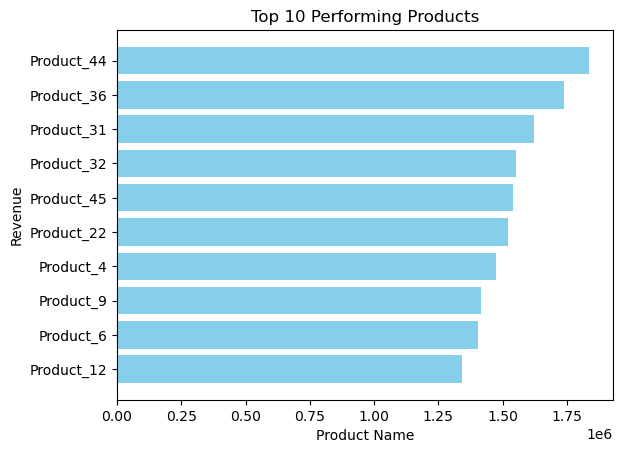

  product_id product_name category  units_sold   price     revenue  \
0       P001    Product_1   Sports        1488   36.46    54252.48   
1       P002    Product_2    Books        2566  158.94   407840.04   
2       P003    Product_3     Home         785  165.97   130286.45   
3       P004    Product_4    Books        4024  366.16  1473427.84   
4       P005    Product_5    Books          44  320.59    14105.96   

            status  
0  Underperforming  
1       Performing  
2  Underperforming  
3       Performing  
4  Underperforming  


In [7]:
#Importing the required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#QUESTION 2
#2a. Load a Dataset called "products.csv" into a DataFrame:
df = pd.read_csv("products.csv")
#Displaying the full data of the dataset:
print(df.to_string())
#Displaying the summary information of the dataset:
print(df.info())

#2b. 
#i. Handling missing prices creatively:
#   Fill missing prices with the mean price
df = df.fillna({"price": df["price"].mean()})

#ii. Calculating total revenue per product:
# revenue = units_sold * price
df["revenue"] = df["units_sold"] * df["price"]

#2c. Flagging products that may need to be discontinued:
#Creating a new column, "status":
#Using the numpy method, "np.where()", 
#where the units_sold <= 1000 OR revenue <= 100000, the flag is set to "Underperforming", else "Performing": 
df["status"] = np.where((df["units_sold"] <= 1000) | (df["revenue"] <= 100000), "Underperforming", "Performing")

#2d. Visualizing the top-performing products:
#Assign to a variable, "top_performing", the top 10 sorted data by the "revenue" column in descending order
top_performing = df.sort_values(by = "revenue", ascending = False).head(10)
#Plotting a horizontal bar chart because it will best represent the data:
plt.barh(top_performing["product_name"], top_performing["revenue"], color = "skyblue")
#Assigning a title, "Top 10 Performing Products", for the bar chart:
plt.title("Top 10 Performing Products")
#Assigning labels for both x and y axes:
plt.xlabel("Product Name")
plt.ylabel("Revenue")
#Invert y-axis so the highest revenue product appears at the top:
plt.gca().invert_yaxis()
#Display the chart:
plt.show()

#2e. A short Python function that could help automate this analysis weekly:
def analyze_products(file_path):
    #Place all previous work into the Python function:
    #Load the dataset
    df = pd.read_csv("products.csv")
    #Filling missing prices with the mean
    df = df.fillna({"price": df["price"].mean()})
    #Calculate revenue
    df["revenue"] = df["units_sold"] * df["price"]
    #Flag underperforming products
    df["status"] = np.where((df["units_sold"] <= 1000) | (df["revenue"] <= 100000), "Underperforming", "Performing")
    return df

#Example Usage of the function:
weekly_report = analyze_products("products.csv")
print(weekly_report.head())

   patient_id  age     sex   BMI  blood_pressure  disease_score
0       P0001   69  Female  20.3             106             89
1       P0002   32  Female  32.0             122             47
2       P0003   89    Male  24.9              98             84
3       P0004   78    Male  16.6             132             38
4       P0005   38    Male  19.6             137             99
5       P0006   41    Male  20.0             128             32
6       P0007   20    Male  25.5             131             93
7       P0008   39    Male  22.8             115            100
8       P0009   70  Female  21.7             139             22
9       P0010   19    Male  25.0             114              9
10      P0011   47    Male  27.4             113             68
11      P0012   55    Male  23.7             102             99
12      P0013   19  Female  22.1             149             33
13      P0014   81    Male  22.9              96             51
14      P0015   77    Male  26.7        

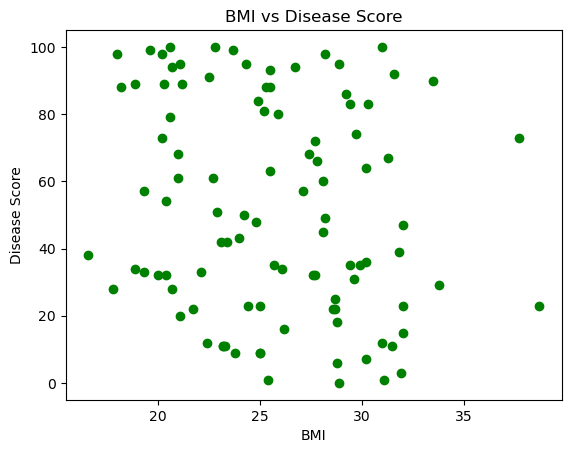

risk_level
Highly Risky        37
Less Risky          14
Moderately Risky    49
dtype: int64


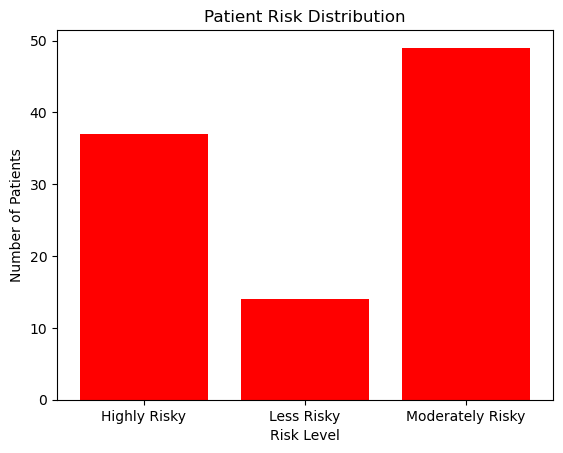

   patient_id  age     sex   BMI  blood_pressure  disease_score        risk_level  BMI_age_ratio
0       P0001   69  Female  20.3             106             89      Highly Risky       0.294203
1       P0002   32  Female  32.0             122             47  Moderately Risky       1.000000
2       P0003   89    Male  24.9              98             84      Highly Risky       0.279775
3       P0004   78    Male  16.6             132             38  Moderately Risky       0.212821
4       P0005   38    Male  19.6             137             99      Highly Risky       0.515789
5       P0006   41    Male  20.0             128             32        Less Risky       0.487805
6       P0007   20    Male  25.5             131             93      Highly Risky       1.275000
7       P0008   39    Male  22.8             115            100      Highly Risky       0.584615
8       P0009   70  Female  21.7             139             22        Less Risky       0.310000
9       P0010   19    Male  25

In [8]:
#Importing the required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#QUESTION 3
#3a. Loading a Dataset called "health_data.csv" into a DataFrame:
df = pd.read_csv("health_data.csv")
#Displaying the full data of the dataset:
print(df.to_string())
#Displaying the summary statistics of the dataset:
print(df.describe())

"""
The most useful variables for risk analysis in the health_data.csv dataset are 
BMI, blood pressure, disease_score, and age, because they directly capture patient 
health status and correlate strongly with chronic illness risk.
"""

#3b. Creating a scatter plot to investigate BMI vs. disease score:
#Plotting a scatter plot with the "BMI" column on the x-axis and the "disease_score" column on the y-axis:
plt.scatter(df["BMI"], df["disease_score"], color = "green")
#Assigning a title, "BMI vs Disease Score", for the scatter plot:
plt.title("BMI vs Disease Score")
#Assigning labels for both x and y axes:
plt.xlabel("BMI")
plt.ylabel("Disease Score")
#Display the scatter plot:
plt.show()

#3c. Defining my own logic to classify patients into risk levels:
def risk_levels(bmi, disease_score):
    if bmi < 18.5:
        if disease_score < 34:
            return "Less Risky"
        elif disease_score < 67:
            return "Moderately Risky"
        else:
            return "Highly Risky"
    elif 18.5 <= bmi < 25:
        if disease_score < 34:
            return "Less Risky"
        elif disease_score < 67:
            return "Moderately Risky"
        else:
            return "Highly Risky"
    else:
        if disease_score < 34:
            return "Moderately Risky"
        elif disease_score < 67:
            return "Moderately Risky"
        else:
            return "Highly Risky"

#Creating a new column, applying the Python-defined function:  
df["risk_level"] = df.apply(lambda row: risk_levels(row["BMI"], row["disease_score"]), axis = 1)

#3d. 
#i. Counting how many patients fall into each risk level:
#Group the "risk_level" column, get the size for each group, and assign to a variable, "risk_group":
risk_group = df.groupby("risk_level").size()
#Display the "risk_group" variable:
print(risk_group)

#ii. Visualizing it:
#Plotting a bar chart with the index and the value of the "risk_group" on the x and y-axis, respectively:
plt.bar(risk_group.index, risk_group, color = "red")
#Assigning a title, "Patient Risk Distribution", for the scatter plot:
plt.title("Patient Risk Distribution")
#Assigning labels for both x and y axes:
plt.xlabel("Risk Level")
plt.ylabel("Number of Patients")
#Display the bar chart:
plt.show()

#3e. Creating a new feature:
#Creating a new column, "BMI_age_ratio", which is the division of the values in the "BMI" column by the "age" column:
# "BMI_age_ratio" = "BMI" / "age"
df["BMI_age_ratio"] = df["BMI"] / df["age"]
#Display the cleaned, updated dataset:
print(df.to_string())

   patient_id  age sex   BMI  blood_pressure  disease_score
0        P001   52   F  31.2             140             88
1        P002   27   M  22.5             120             45
2        P003   65   F  29.8             135             72
3        P004   38   M  33.1             145             91
4        P005   44   F  26.7             130             60
5        P006   59   M  35.0             150             95
6        P007   23   F  19.8             115             38
7        P008   70   M  28.5             138             77
8        P009   36   F  30.2             142             85
9        P010   48   M  25.6             125             53
10       P011   55   F  32.4             148             92
11       P012   29   M  24.1             118             41
12       P013   62   F  27.9             132             66
13       P014   41   M  34.5             152             89
14       P015   33   F  21.7             110             35
15       P016   46   M  30.8            

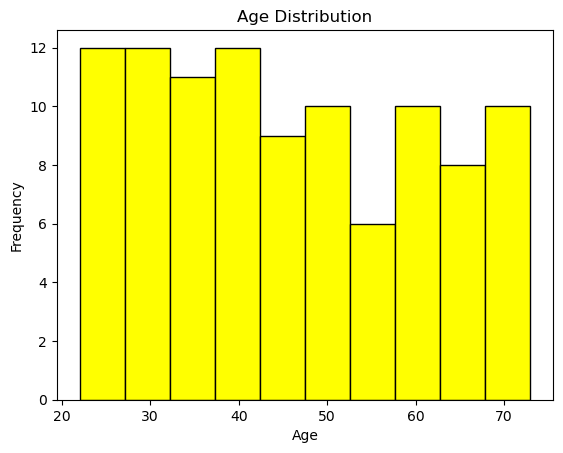

'\nNOTE:\nAutomated classification in healthcare should never replace professional judgement.\nModels may introduce bias and must be used responsibly.\n'

In [14]:
#Importing the required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#QUESTION 4
#Loading a Dataset called "The Eastern Cape Health Audit.csv" into a DataFrame:
df = pd.read_csv("The Eastern Cape Health Audit.csv")
#Displaying the full data of the dataset:
print(df.to_string())
#Displaying the summary information of the dataset:
print(df.info())

#4a. Cleaning the dataset:
#i. Removing duplicates:
df = df.drop_duplicates()

#ii. Filling missing values:
#Replacing with 0 as a default
df = df.fillna(0)

#iii. Normalizing key fields for BMI and disease_score columns:
# To normalize the "BMI" and "disease_score" columns:
# BMI = (BMI - mean(BMI)) / standard_deviation(BMI)
# disease_score = (disease_score - mean(disease_score)) / standard_deviation(disease_score)
df["BMI"] = (df["BMI"] - df["BMI"].mean()) / df["BMI"].std()
df["disease_score"] = (df["disease_score"] - df["disease_score"].mean()) / df["disease_score"].std()

#4b. Randomly sampling 20 patients and comparing their statistics to the full dataset:
#Assign to a variable, "sample", using the "df.sample()" method, to sample 20 data from the dataset:
sample = df.sample(20)
#Displaying the statistics of the "sample" variable:
print("Sample Statistics:\n", sample.describe())
#Displaying the statistics of the full dataset:
print("Full Dataset Statistics:\n", df.describe())

#4c. Creating a frequency distribution of age:
#Plotting a histogram of the "age" column:
plt.hist(df["age"], bins = 10, color = "yellow", edgecolor = "black")
#Assigning a title, "Age Distribution", for the scatter plot:
plt.title("Age Distribution")
#Assigning labels for both x and y axes:
plt.xlabel("Age")
plt.ylabel("Frequency")
#Displaying the histogram:
plt.show()

#4d. Applying a simple Naïve Bayes-style logic to classify patients:
#Creating a new column, "status":
#Using the numpy method, "np.where()", 
#where the BMI >= 25 AND disease_score >= 67, the flag is set to "Critical", else "Stable": 
df["status"] = np.where((df["BMI"] >= 25) & (df["disease_score"] >= 67), "Critical", "Stable")

#4e. 
#i.Saving the cleaned and classified dataset:
df.to_csv("The Eastern Cape Health Audit_cleaned.csv")

#ii. Note About Ethical Considerations:
"""
NOTE:
Automated classification in healthcare should never replace professional judgement.
Models may introduce bias and must be used responsibly.
"""